In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [91]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [106]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [96]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [98]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [107]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [100]:
len(X_train[0])

60

In [101]:
len(y_train)

1198

In [109]:
import tensorflow as tf
from keras.layers import Dense 
from keras.layers import LSTM
from keras.layers import Dropout

from keras.models import Sequential


In [110]:
regressor = Sequential()


In [111]:
regressor.add(tf.keras.layers.LSTM(units = 50, return_sequences =True ,   input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(tf.keras.layers.LSTM(units =50 , return_sequences = True ))
regressor.add(Dropout(0.2))
regressor.add(tf.keras.layers.LSTM(units = 50 , return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(tf.keras.layers.LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(tf.keras.layers.Dense(units = 1 ))
regressor.add(Dropout(0.2))
                                   

C:\Users\gurud\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [120]:
regressor.compile(optimizer = 'adam'  , loss="mean_squared_error")
regressor.fit(X_train , y_train , epochs = 20 , batch_size = 32)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 26s 222ms/step - loss: 0.0689
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 223ms/step - loss: 0.0670
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - loss: 0.0679
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 169ms/step - loss: 0.0660
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - loss: 0.0685
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - loss: 0.0705
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - loss: 0.0686
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - loss: 0.0611
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - loss: 0.0708
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - loss: 0.0616
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - loss: 0.0768
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - loss: 0.0694
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - loss: 0.0765
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.0784
Epoch 15/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 187ms/step - l

In [113]:
test_set = pd.read_csv("Google_Stock_Price_Test.csv")

In [114]:
real_stock_price = test_set.iloc[:,1:2].values

In [118]:
dataset_total = pd.concat((dataset_train['Open'], test_set['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


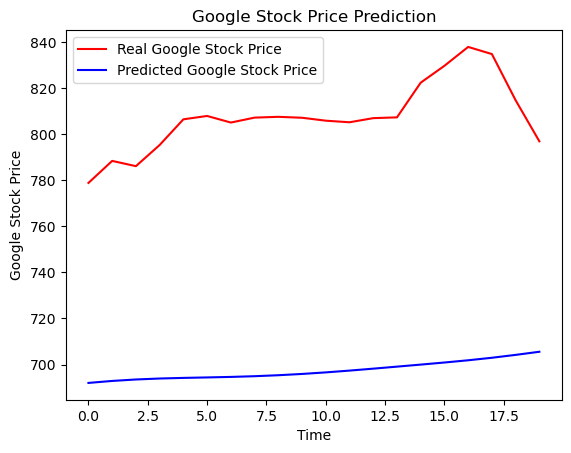

In [119]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
